#Importing all the necessary libraries

In [81]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore", category=DeprecationWarning)
 
%matplotlib inline
 
 
#regular expression 
 
import string
#string functions ke liye
 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
 
## Machine Learning Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
 
 
import warnings
warnings.filterwarnings("ignore")
 
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
 
#from google.colab import files
#files.upload()





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
#from google.colab import files
#files.upload()




In [83]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
train_original = train_data.copy()
test_original=test_data.copy()
test_data.shape
train_data.shape


(31962, 3)

In [84]:
ds = train_data.append(test_data,ignore_index=True,sort=True)

In [85]:
ds.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


# Pre Processing the data

In [86]:
## Remove tweeter id

def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

ds['Tidy_Tweets'] = np.vectorize(remove_pattern)(ds['tweet'], "@[\w]*")

ds.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [87]:
#Removing extra alphabets such as colon, brackets etc..
ds['Tidy_Tweets'] = ds['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

ds.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [88]:
#removing short words
ds['Tidy_Tweets'] = ds['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

ds.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [89]:
#tokenization 

tokenized_tweet = ds['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

In [90]:
#stemming

from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

ds['Tidy_Tweets'] = tokenized_tweet
ds.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


#Word cloud visualtion

In [91]:

from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [92]:

all_words_positive = ' '.join(text for text in ds['Tidy_Tweets'][ds['label']==0])

In [93]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

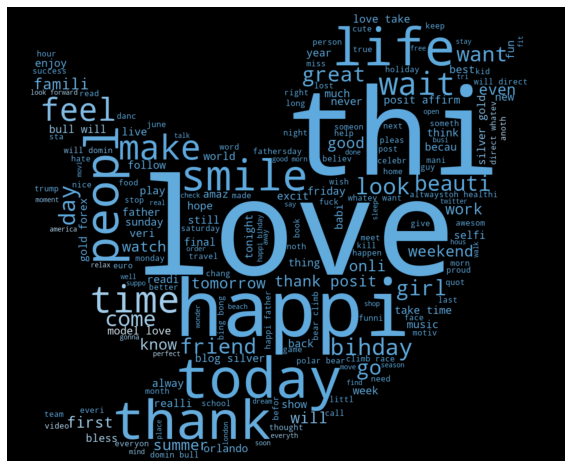

In [94]:
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [95]:
all_words_negative = ' '.join(text for text in ds['Tidy_Tweets'][ds['label']==1])

In [96]:

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

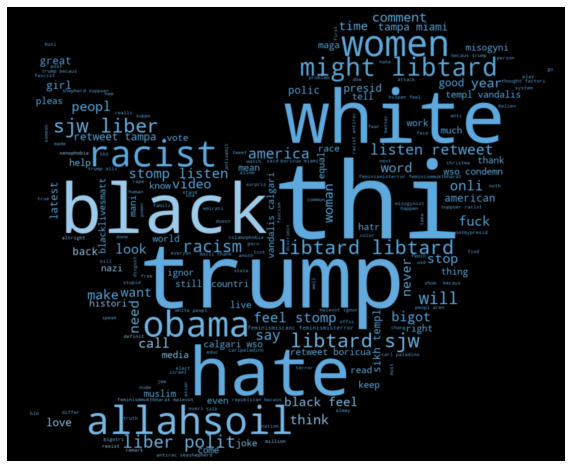

In [97]:

# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

#Hashtags

In [98]:
def Hashtags_Extract(x):
    hashtags=[]
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [99]:

ht_positive = Hashtags_Extract(ds['Tidy_Tweets'][ds['label']==0])

ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [100]:

ht_positive_unnest = sum(ht_positive,[])

In [101]:
ht_negative = Hashtags_Extract(ds['Tidy_Tweets'][ds['label']==1])

ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [102]:

ht_negative_unnest = sum(ht_negative,[])
ht_negative_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

#ploting bar graphs

In [103]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'run': 72,
          'lyft': 2,
          'disapoint': 1,
          'getthank': 2,
          'model': 375,
          'motiv': 202,
          'allshowandnogo': 1,
          'school': 30,
          'exam': 9,
          'hate': 27,
          'imagin': 7,
          'actorslif': 8,
          'revolutionschool': 1,
          'girl': 283,
          'allin': 4,
          'cav': 12,
          'champion': 5,
          'cleveland': 9,
          'clevelandcavali': 1,
          'ireland': 18,
          'blog': 356,
          'silver': 300,
          'gold': 301,
          'forex': 265,
          'orlando': 239,
          'standwithorlando': 2,
          'pulseshoot': 11,
          'orlandoshoot': 61,
          'biggerproblem': 1,
          'selfish': 3,
          'heabreak': 19,
          'valu': 8,
          'love': 1654,
          'gettingf': 1,
          'got': 9,
          'junior': 3,
          'yugyoem': 1,
          'omg': 27,
          'thank': 534,
          'posit': 917,
       

In [104]:

df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


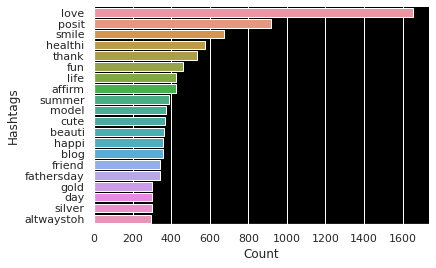

In [105]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [106]:

word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'cnn': 10,
          'michigan': 2,
          'tcot': 14,
          'australia': 6,
          'opkillingbay': 5,
          'seashepherd': 22,
          'helpcovedolphin': 3,
          'thecov': 4,
          'neverump': 8,
          'xenophobia': 12,
          'love': 11,
          'peac': 8,
          'race': 14,
          'ident': 1,
          'med': 1,
          'altright': 18,
          'whitesupremaci': 6,
          'linguist': 1,
          'power': 2,
          'raciolinguist': 1,
          'brexit': 27,
          'peopl': 11,
          'trump': 136,
          'republican': 13,
          'michelleobama': 8,
          'knick': 1,
          'golf': 1,
          'jewishsupremacist': 1,
          'libtard': 77,
          'sjw': 75,
          'liber': 81,
          'polit': 95,
          'trash': 1,
          'hate': 37,
          'stereotyp': 4,
          'prejudic': 3,
          'hope': 5,
          'conflict': 1,
          'pol': 1,
          'bluelivesmatt': 3,
          

In [107]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


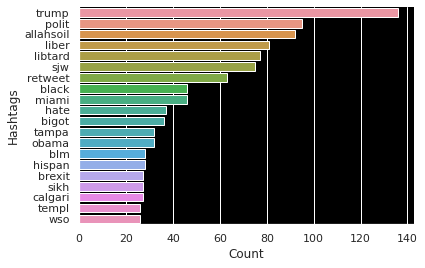

In [108]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

#bag of words 

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(ds['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# TF-IDF

In [110]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(ds['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.532509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.411886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Splitting our dataset into Training and Validation Set

In [111]:
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [112]:
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# BOW features
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train_data['label'],test_size=0.2,random_state=2)

In [115]:
# TF - IDF features
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train_data['label'],test_size=0.2,random_state=17)

#Applying Machine Learning Models

Here we will use 5 different models
Logistic Regression
XGBoost
Decision Trees
Naive Bayes 
KNN

In [116]:
#using f1 score instead of accuracy
from sklearn.metrics import f1_score

#Logistic Regression

**BOW**

In [117]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [118]:
# Fitting LR
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
#Prediction
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.89112373e-01, 1.08876267e-02],
       [9.99765198e-01, 2.34801610e-04],
       [9.10996568e-01, 8.90034325e-02],
       ...,
       [9.91126456e-01, 8.87354442e-03],
       [9.80995240e-01, 1.90047599e-02],
       [9.95703900e-01, 4.29609982e-03]])

F1 Score = 50.29 %




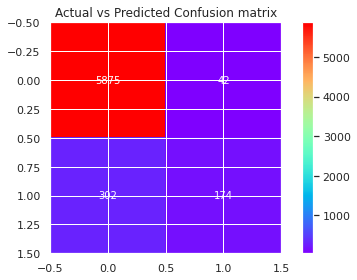

In [120]:
#Calculating the F1 score
#if prediction is greater than or equal to 0.3 than 1 else 0
#Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets

prediction_int = prediction_bow[:,1]>=0.5

#converting the results to integer type
#prediction_bow =prediction_bow(np.int) 

#calculating f1 score
f1_lr_bow= f1_score(y_valid_bow,prediction_int)

print('F1 Score = '+str('{:04.2f}'.format(f1_lr_bow*100) +' %'))
print('\n')

cm= confusion_matrix(y_valid_bow,prediction_int)
fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='rainbow')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="w")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()

TFIDF

In [121]:
#fitting LR
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
#Prediction
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98567538, 0.01432462],
       [0.98152855, 0.01847145],
       [0.9469619 , 0.0530381 ],
       ...,
       [0.90186008, 0.09813992],
       [0.98819203, 0.01180797],
       [0.97812564, 0.02187436]])

[False False False ... False False False]
[0 0 0 ... 0 0 0]
F1 Score = 48.71 %




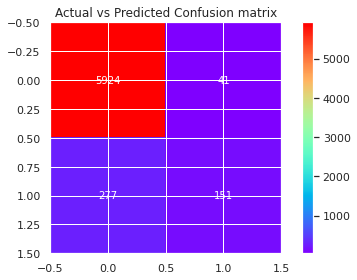

In [123]:
#Calculating F1
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.5
print(prediction_int)
prediction_int = prediction_int.astype(np.int)
print(prediction_int)

# calculating f1 score
f1_lr_tf = f1_score(y_valid_tfidf, prediction_int)

print('F1 Score = '+str('{:04.2f}'.format(f1_lr_tf*100) +' %'))
print('\n')

cm= confusion_matrix(y_valid_tfidf, prediction_int)
fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='rainbow')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="w")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()




---



#XG Boost




**BOW**

In [124]:
from xgboost import XGBClassifier

In [125]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [126]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.9, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=22,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

F1 Score = 50.82 %




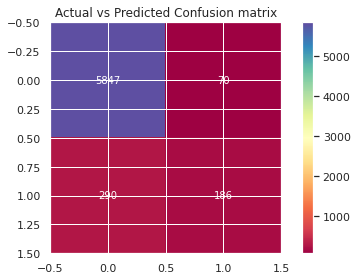

In [127]:
xgb = model_bow.predict_proba(x_valid_bow)

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.5

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
f1_xgb_bow=f1_score(y_valid_bow,xgb_int)

print('F1 Score = '+str('{:04.2f}'.format(f1_xgb_bow*100) +' %'))
print("\n")

# Confusion matrix

cm= confusion_matrix(y_valid_bow,xgb_int)
fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='Spectral')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="w")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()

**TF-IDF Features**

In [128]:
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)

In [129]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.7, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=29,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [130]:
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[0.9957494 , 0.0042506 ],
       [0.9900397 , 0.00996027],
       [0.9580604 , 0.04193961],
       ...,
       [0.9159529 , 0.08404709],
       [0.9787027 , 0.02129725],
       [0.9870468 , 0.01295321]], dtype=float32)

F1 Score = 54.12 %




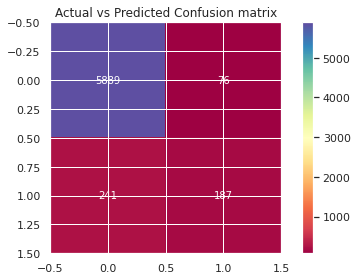

In [131]:
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.5

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
f1_xgb_tf=f1_score(y_valid_tfidf,xgb_int_tfidf)

print('F1 Score = '+str('{:04.2f}'.format(f1_xgb_tf*100) +' %'))
print('\n')

cm= confusion_matrix(y_valid_tfidf,xgb_int_tfidf)
fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='Spectral')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="w")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()

#Decision Trees

In [132]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

**BOW** 

In [133]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

F1 Score = 55.14 %




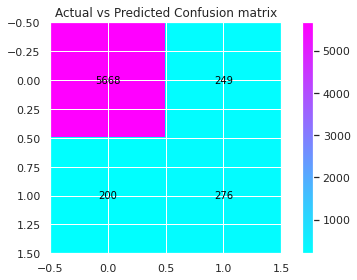

In [134]:
dct_bow = dct.predict_proba(x_valid_bow)
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.5

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
f1_dct_bow=f1_score(y_valid_bow,dct_int_bow)

print('F1 Score = '+str('{:04.2f}'.format(f1_dct_bow*100))+' %')
print('\n')

cm= confusion_matrix(y_valid_bow,dct_int_bow)


fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='cool')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="black")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()

**TF-IDF**

In [135]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [136]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

F1 Score = 55.18 %




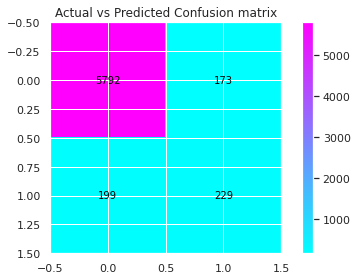

In [137]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.5

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
f1_dct_tf=f1_score(y_valid_tfidf,dct_int_tfidf)

print('F1 Score = '+str('{:04.2f}'.format(f1_dct_tf*100))+' %')
print('\n')

cm= confusion_matrix(y_valid_tfidf,dct_int_tfidf)


fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='cool')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="black")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()

# Naive Bayes

In [138]:
from sklearn.naive_bayes import MultinomialNB

In [139]:
#BOW
MNB  = MultinomialNB()
MNB.fit(x_train_bow,y_train_bow)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

F1 Score = 55.20 %




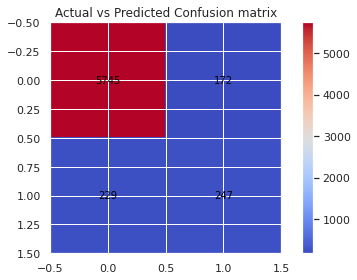

In [140]:
from sklearn import metrics
predicted_mnb = MNB.predict_proba(x_valid_bow)
#print(predicted_mnb)

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
nm_bow_int = predicted_mnb[:,1]>=0.5
#print(prediction_int)
nm_bow_int = nm_bow_int.astype(np.int)
#print(prediction_int)

# calculating f1 score
f1_nb_bow = f1_score(y_valid_bow, nm_bow_int)

print('F1 Score = '+str('{:04.2f}'.format(f1_nb_bow*100))+' %')
print('\n')
cm= confusion_matrix(y_valid_bow,nm_bow_int)


fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='coolwarm')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="black")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()

In [141]:
# IF-TDF
MNB.fit(x_train_tfidf,y_train_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

F1 Score = 43.32 %




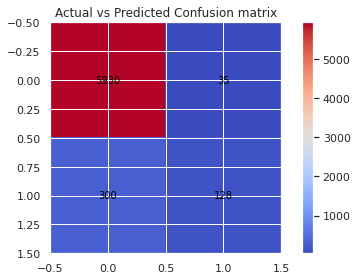

In [142]:
predicted_mnb_tfidf = MNB.predict_proba(x_valid_tfidf)
nm_tf_int = predicted_mnb_tfidf[:,1]>=0.5
#print(prediction_int)
nm_tf_int = nm_tf_int.astype(np.int)
#print(prediction_int)


# calculating f1 score
f1_nb_lr = f1_score(y_valid_tfidf, nm_tf_int)

print('F1 Score = '+str('{:04.2f}'.format(f1_nb_lr*100))+' %')
print('\n')
cm= confusion_matrix(y_valid_tfidf,nm_tf_int)


fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='coolwarm')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="black")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()

# KNN

In [143]:
#BOW
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train_bow, y_train_bow)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

F1 Score = 47.11 %




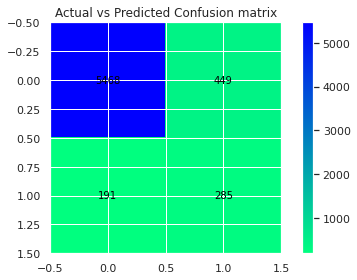

In [144]:
pred_knn_bow = knn.predict_proba(x_valid_bow)
#print(pred_knn_bow)
knn_bow_int = pred_knn_bow[:,1]>=0.5
knn_bow_int = knn_bow_int.astype(np.int) 
#print(prediction_int)
f1_knn_bow = f1_score(y_valid_bow,knn_bow_int)
print('F1 Score = '+str('{:04.2f}'.format(f1_knn_bow*100))+' %')
print('\n')
cm= confusion_matrix(y_valid_bow,knn_bow_int)


fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='winter_r')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="black")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()

In [145]:
# TF IDF
knn.fit(x_train_tfidf, y_train_tfidf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

F1 Score = 46.37 %




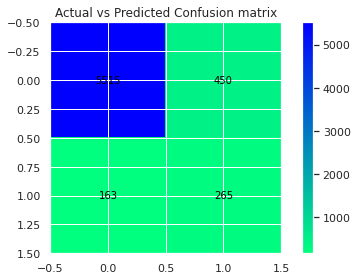

In [146]:

pred_knn_tfidf = knn.predict_proba(x_valid_tfidf)
knn_tf_int = pred_knn_tfidf[:,1]>=0.5
#print(prediction_int)
knn_tf_int = knn_tf_int.astype(np.int)
#print(prediction_int)


# calculating f1 score
f1_knn_lr = f1_score(y_valid_tfidf, knn_tf_int)
print('F1 Score = '+str('{:04.2f}'.format(f1_knn_lr*100))+' %')
print('\n')
cm= confusion_matrix(y_valid_tfidf,knn_tf_int)


# Confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm,cmap ='winter_r')

for i in range(2):
  for j in range(2):
    text = ax.text( j,i,cm[i,j], ha="center", va="center", color="black")

ax.set_title("Actual vs Predicted Confusion matrix")
fig.tight_layout()
plt.colorbar(im)
plt.show()

#Model Comparison

**Bag-of-Words**

In [147]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','MultinomialNaiveBayes(Bag-of-Words)','KNN(Bag-of-Words)']

score_1 = [f1_lr_bow,f1_xgb_bow,f1_dct_bow,f1_nb_bow,f1_knn_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,6)])

compare_1.T

,1,2,3,4,5
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),MultinomialNaiveBayes(Bag-of-Words),KNN(Bag-of-Words)
F1_Score,0.50289,0.508197,0.551449,0.551955,0.471074


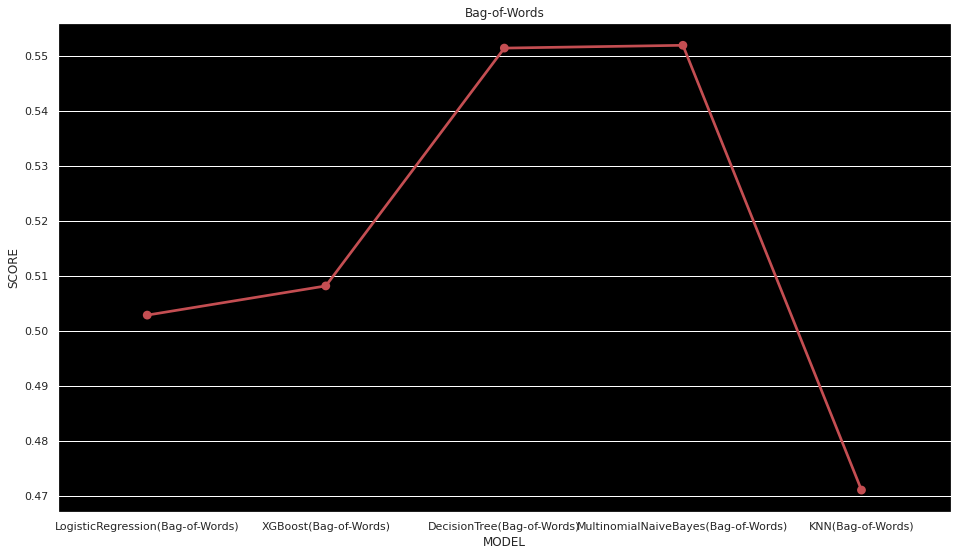

In [148]:
# GRAPH
plt.figure(figsize=(16,9))
sns.set(rc={ 'axes.facecolor':'black','figure.facecolor':'gray'})
sns.pointplot(x='Model',y='F1_Score',data=compare_1,color='r')

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

**TF-IDF**

In [149]:

Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)','MultinomialNaiveBayes(TF-IDF)','KNN(TF-IDF)']

score_2 = [f1_lr_tf,f1_xgb_tf,f1_dct_tf,f1_nb_lr,f1_knn_lr]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,6)])

compare_2.T

,1,2,3,4,5
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF),MultinomialNaiveBayes(TF-IDF),KNN(TF-IDF)
F1_Score,0.487097,0.541245,0.551807,0.433164,0.463692


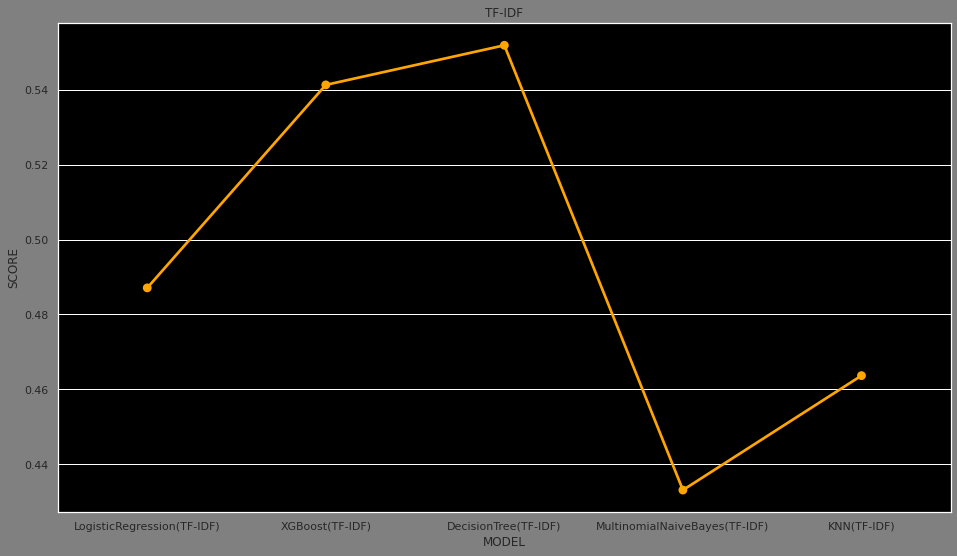

In [150]:
#Comparison Graph
plt.figure(figsize=(16,9))
sns.set(rc={ 'axes.facecolor':'black','figure.facecolor':'gray'})
sns.pointplot(x='Model',y='F1_Score',data=compare_2,color='orange')

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [151]:
#
Algo_best = ['DecisionTree(Bag-of-Words)','DecisionTree(TF-IDF)']

score_best = [f1_dct_bow,f1_dct_tf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,DecisionTree(Bag-of-Words),DecisionTree(TF-IDF)
F1_Score,0.551449,0.551807


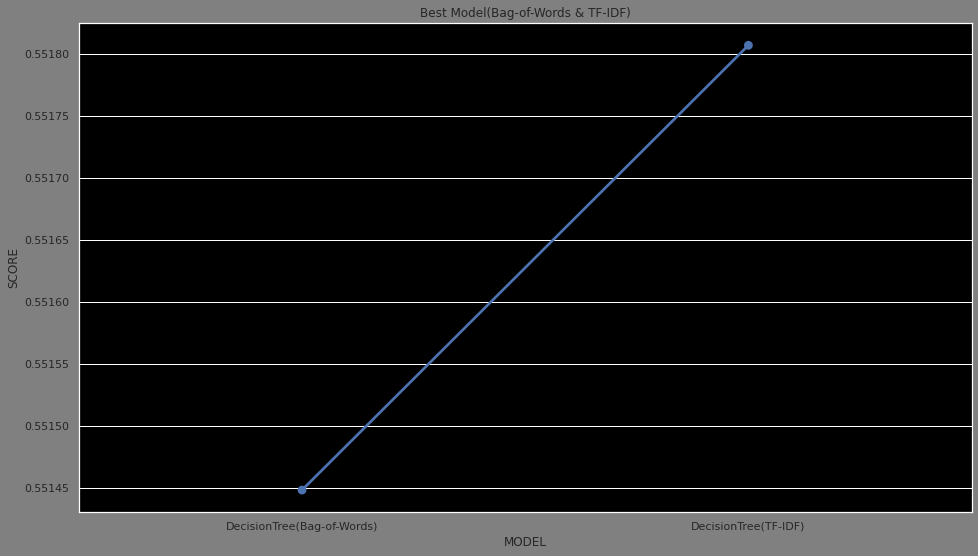

In [152]:

plt.figure(figsize=(16,9))

sns.pointplot(x='Model',y='F1_Score',data=compare_best,)

plt.title('Best Model(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [153]:
#Applying the Best model on our data
test_tfidf = tfidf_matrix[31962:]
test_pred = dct.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.5
test_pred_int = test_pred_int.astype(np.int)

test_data['label'] = test_pred_int

submission = test_data[['id','label']]
submission.to_csv('result.csv', index=False)

In [154]:
#Results
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
